In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import random 

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/BIG%20MART%20SALES%20PREDICTION%20data/Train.csv'
df = pd.read_csv(url)
#url = 'https://raw.githubusercontent.com/Amnuaysak/HomeWork_codecamp_5/master/BIG%20MART%20SALES%20PREDICTION%20data/Test.csv'
#X_test = pd.read_csv(url)

#https://www.kaggle.com/devashish0507/big-mart-sales-prediction?select=Train.csv

In [ ]:
df.iloc[:,2] = df.iloc[:,2].replace(['Low Fat','Regular','reg','low fat'],['LF','REG','REG','LF'])

In [ ]:
df.iloc[:,7] = df.iloc[:,7].astype('category') #27

In [ ]:
df.iloc[:,1].fillna(value=df.iloc[:,1].mean(),inplace = True) #29
df.iloc[:,8].fillna(value= 'Medium' ,inplace = True)

In [ ]:
df.drop(df.columns[[0,6,7]],axis=1,inplace=True) #30

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Item_Weight           8523 non-null   float64
 1   Item_Fat_Content      8523 non-null   object 
 2   Item_Visibility       8523 non-null   float64
 3   Item_Type             8523 non-null   object 
 4   Item_MRP              8523 non-null   float64
 5   Outlet_Size           8523 non-null   object 
 6   Outlet_Location_Type  8523 non-null   object 
 7   Outlet_Type           8523 non-null   object 
 8   Item_Outlet_Sales     8523 non-null   float64
dtypes: float64(4), object(5)
memory usage: 599.4+ KB


In [ ]:
df_real = pd.get_dummies(df,drop_first=True)

In [ ]:
df_real.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 27 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Item_Weight                      8523 non-null   float64
 1   Item_Visibility                  8523 non-null   float64
 2   Item_MRP                         8523 non-null   float64
 3   Item_Outlet_Sales                8523 non-null   float64
 4   Item_Fat_Content_REG             8523 non-null   uint8  
 5   Item_Type_Breads                 8523 non-null   uint8  
 6   Item_Type_Breakfast              8523 non-null   uint8  
 7   Item_Type_Canned                 8523 non-null   uint8  
 8   Item_Type_Dairy                  8523 non-null   uint8  
 9   Item_Type_Frozen Foods           8523 non-null   uint8  
 10  Item_Type_Fruits and Vegetables  8523 non-null   uint8  
 11  Item_Type_Hard Drinks            8523 non-null   uint8  
 12  Item_Type_Health and

**ข้อ 43**

In [ ]:
label_col = 3 #กำหนด index ให้ label เพื่อความสะดวกในการแก้ code #43

X = df_real.drop(df_real.columns[label_col],axis=1)
y = df_real.iloc[:,[label_col]]

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [ ]:
X_train , X_test,y_train,y_test = train_test_split(X,y,train_size = 0.8,random_state=100)

In [ ]:
lm = LinearRegression() 

lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**ข้อ 44**

In [ ]:
lm.intercept_,lm.coef_ #44

(array([-0.00146115]),
 array([[ 5.63449408e-04, -6.28133980e-03,  5.68542648e-01,
          1.61308240e-02, -3.72744362e-03,  9.84832470e-04,
          5.15656334e-04, -6.13989372e-03, -7.03113229e-03,
         -2.29800251e-04,  8.47198361e-05,  1.29133694e-03,
         -7.94246313e-03,  1.07021837e-04,  3.57738980e-03,
          1.40919275e-02, -3.74899068e-03, -4.49763508e-03,
         -4.29473006e-04,  1.25175043e-03,  3.89092549e-03,
          1.90917938e-03, -1.06016332e-03,  5.41543358e-01,
          2.94636121e-01,  6.10967700e-01]]))

In [ ]:
y_predict = lm.predict(X_test)
y_predict = sc_y.inverse_transform(y_predict)
y_test = sc_y.inverse_transform(y_test)

**ข้อ 45**

In [ ]:
metrics.mean_absolute_error(y_test,y_predict),metrics.mean_squared_error(y_test,y_predict),np.sqrt(metrics.mean_squared_error(y_test,y_predict)),metrics.r2_score(y_test,y_predict) #45

(859.4498932717854, 1334413.4059584306, 1155.1681288706118, 0.547705718335401)

In [ ]:
fig = plt.figure(figsize=(8,6)) 

<Figure size 576x432 with 0 Axes>

**ข้อ 46**

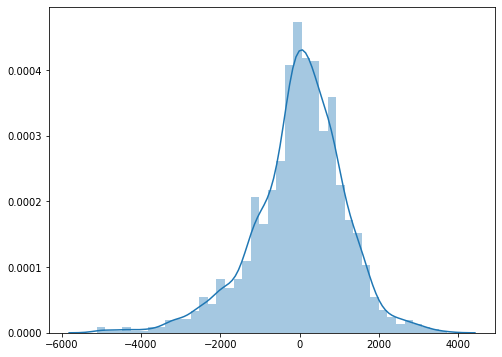

In [ ]:
fig = plt.figure(figsize=(8,6)) #46
sns.distplot(y_predict-y_test) 

**ข้อ 47**

In [ ]:
y_test = y_test.flatten() #47
y_predict = y_predict.flatten()


dict_compare = {'sale':y_test,'predict':y_predict}
compare_dict = pd.DataFrame(dict_compare)
compare_dict.sample(5)

,sale,predict
358,5635.3312,3871.179883
1626,4459.5284,4262.213114
702,1904.1880,3078.655816
1154,6704.6060,4330.500087
585,2648.5524,2393.347099


**ข้อ 48**

In [ ]:
compare_dict.corr() #48

,sale,predict
sale,1.00000,0.74015
predict,0.74015,1.00000
